# Market segmentation example

In this notebook we explore a bit more sophisticated example of clustering

## Import the relevant libraries

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
from sklearn.cluster import KMeans 

## Load the data

In [2]:
# Load the data from 3.12. Example.csv

dataset = pd.read_csv("3.12. Example.csv")
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


## Plot the data

Create a preliminary plot to see if you can spot something

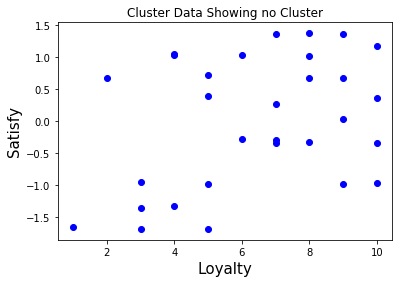

In [3]:
# We are creating a scatter plot of the two variables

plt.scatter(x,y, c = "blue")
plt.xlabel("Loyalty", fontsize=15)
plt.ylabel("Satisfy", fontsize=15)
plt.title("Cluster Data Showing no Cluster")
plt.show();

## Select the features

In [4]:
# Select both features by creating a copy of the data variable

data = dataset.copy()



## Clustering

In [5]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for

kmeans = KMeans(4)

kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [6]:
# Create a copy of the input data
dat = data.copy()

dat["prediction"] = kmeans.fit_predict(dat)
dat

,Satisfaction,Loyalty,prediction
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,1
5,1,-1.66,2
6,10,-0.97,0
7,8,-0.32,3
8,8,1.02,3
9,8,0.68,3


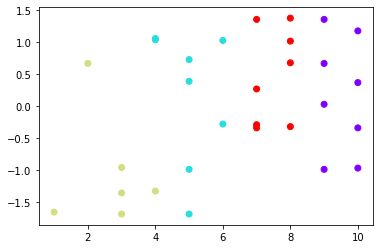

In [7]:
# plot the data

plt.scatter(dat["Satisfaction"], dat["Loyalty"], c=dat["prediction"], cmap = "rainbow")
plt.show();




## Standardize the variables

Let's standardize and check the new result

In [8]:
# Import a library which can do that easily

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(data)
data

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [9]:
# Createa an empty list

WCSS = []

for i in range(1,10):
    kmean = KMeans(i)
    kmean.fit(data)
    WCSS.append(kmean.inertia_)
    
WCSS

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.423830011052964,
 4.442714808722142,
 3.8352787725108954]

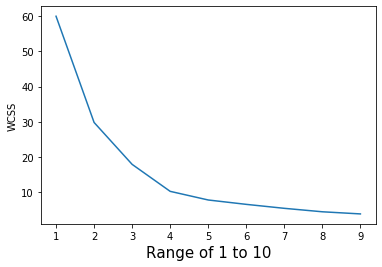

In [10]:
# Plot the number of clusters vs WCSS

plt.plot(range(1,10), WCSS)
plt.xlabel("Range of 1 to 10", fontsize = 15)
plt.ylabel("WCSS")
plt.show();
